# 1.import models

In [101]:
import pandas  as pd 
from warnings import filterwarnings
filterwarnings("ignore")
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
A=pd.read_csv("c:/Users/ullah/Desktop/heart-classi/heart.csv")

# 2.read data

In [102]:
A.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [103]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# 3.Data Exploration

In [104]:
A.target.value_counts()

1    165
0    138
Name: target, dtype: int64

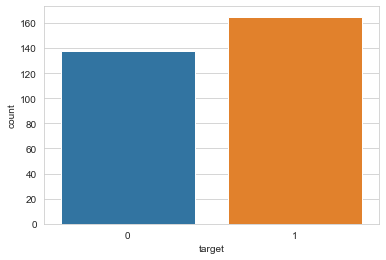

In [105]:
sb.countplot(x="target",data=A)  #since columns is target
plt.show()
# 0=No Disese
#1=have Disese

In [106]:
countNoDisese=len(A[A.target==0])
countHaveDisese=len(A[A.target==1])
print("Percentage of Patients Haven't Heart Disease:",format((countNoDisese/(len(A.target))*100)))
print("Percentage of Patients Have Heart Disease:",format((countHaveDisese/(len(A.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54455445544555
Percentage of Patients Have Heart Disease: 54.45544554455446


Text(0.5, 0, 'sex(0=female,1=male)')

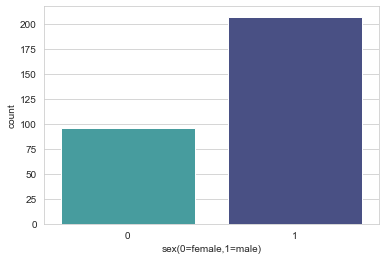

In [107]:
sb.countplot(x="sex",data=A,palette="mako_r")
plt.xlabel("sex(0=female,1=male)")


In [108]:
countFemale=len(A[A.sex==0])
countMale=len(A[A.sex==1])
print("percentage of female patients:",format((countFemale/(len(A.sex))*100)))
print("percentage of Male patients:",format((countMale/(len(A.sex))*100)))

percentage of female patients: 31.683168316831683
percentage of Male patients: 68.31683168316832


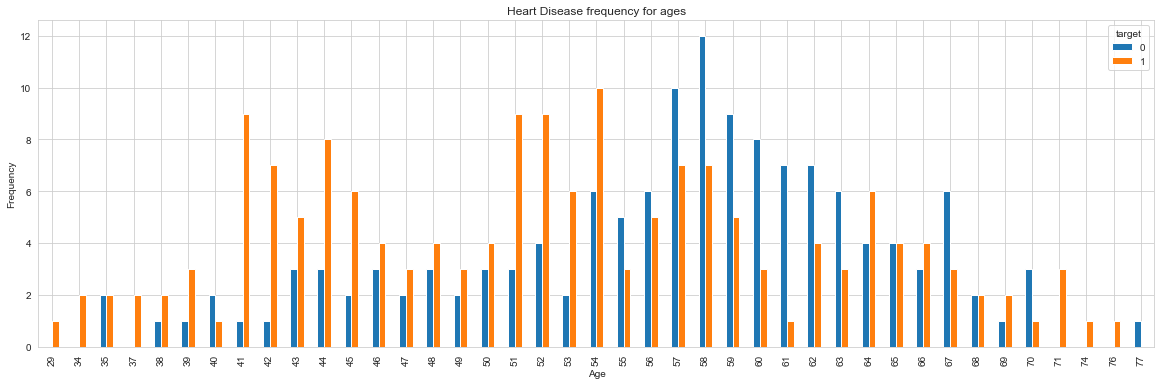

In [109]:
pd.crosstab(A.age,A.target).plot(kind="bar",figsize=(20,6))
plt.title("Heart Disease frequency for ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Maximum Heart Rate')

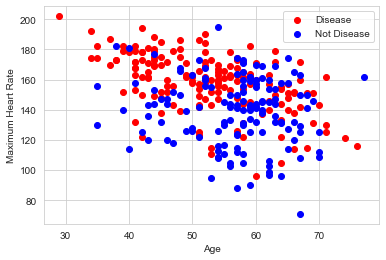

In [110]:
plt.scatter(x=A.age[A.target==1],y=A.thalach[(A.target==1)],c="red")
plt.scatter(x=A.age[A.target==0],y=A.thalach[(A.target==0)],c="blue")
plt.legend(["Disease","Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")

# 4.creating dummy variables for sub-catogery columns

In [111]:
a=pd.get_dummies(A.cp,prefix="CP")
b=pd.get_dummies(A.thal,prefix="Thal")
c=pd.get_dummies(A.slope,prefix='Slop')
A1=A.join(a)
A1=A.join(b)
A1=A.join(c)


In [112]:
frames=[A,a,b,c]
A=pd.concat(frames,axis=1)
A.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,CP_1,CP_2,CP_3,Thal_0,Thal_1,Thal_2,Thal_3,Slop_0,Slop_1,Slop_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [113]:
A.drop(labels=["cp","thal","slope"],axis=1,inplace=True)
A.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,CP_1,CP_2,CP_3,Thal_0,Thal_1,Thal_2,Thal_3,Slop_0,Slop_1,Slop_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


# 5. create model for Logistic Regression

In [114]:
from ANN_modules import preprocessing,replacer,catconsep

In [115]:
Y=A[["target"]]
X=A.drop(labels=["target"],axis=1)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X1=pd.DataFrame(ss.fit_transform(X),columns=X.columns)

In [116]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=31)

from sklearn.linear_model import LogisticRegression
le=LogisticRegression()
model=le.fit(xtrain,ytrain)
pred=model.predict(xtest)

from sklearn.metrics import mean_absolute_error,r2_score
print("MAE:",round(mean_absolute_error(ytest,pred),2))
print("Adj Rsqured:",round(r2_score(ytest,pred),2))

MAE: 0.16
Adj Rsqured: 0.33


In [117]:
accuracies={}
le=LogisticRegression()
le.fit(xtrain,ytrain)
acc=le.score(xtest,ytest)*100

accuracies["Logistic Regression"]=acc # for final chart
print("test_accuracy",format(acc))

test_accuracy 83.60655737704919


# 6. KNN Classification model

In [118]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2) #random no.
knn.fit(xtrain,ytrain)
prediction=knn.predict(xtest)

print("KNN Score:",format(knn.score(xtest,ytest)*100))

KNN Score: 90.1639344262295


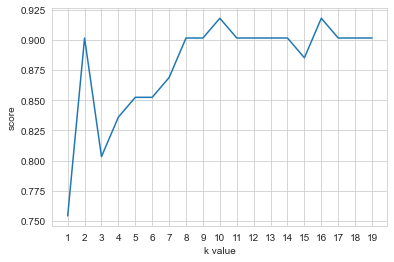

In [119]:
#try to find best n_neighors value
n=[]
for i in range(1,20,1):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(xtrain,ytrain)
    n.append(knn2.score(xtest,ytest))
    
plt.plot(range(1,20,1),n)
plt.xticks(np.arange(1,20,1))
plt.xlabel("k value")
plt.ylabel("score")

accuracies["KNN"]=acc

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=16) #random no.
knn.fit(xtrain,ytrain)
prediction=knn.predict(xtest)

print("KNN Score:",format(knn.score(xtest,ytest)*100))

KNN Score: 91.80327868852459


# 7. DecisionTree classification

In [121]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=21)
dtc.fit(xtrain,ytrain)

acc=dtc.score(xtest,ytest)*100
accuracies["Decision Tree"]=acc
print("DecisionTreeClassificaton_accuracy:",format(acc))

DecisionTreeClassificaton_accuracy: 77.04918032786885


# 8.RandomForest Classification

In [122]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier(n_estimators=1000,random_state=21)
rfr.fit(xtrain,ytrain)

acc=rfr.score(xtest,ytest)*100
accuracies["RandomForest"]=acc
print("RandomForest_classificaton_accuracy",format(acc))

RandomForest_classificaton_accuracy 88.52459016393442


# comparing all models

<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy %'>

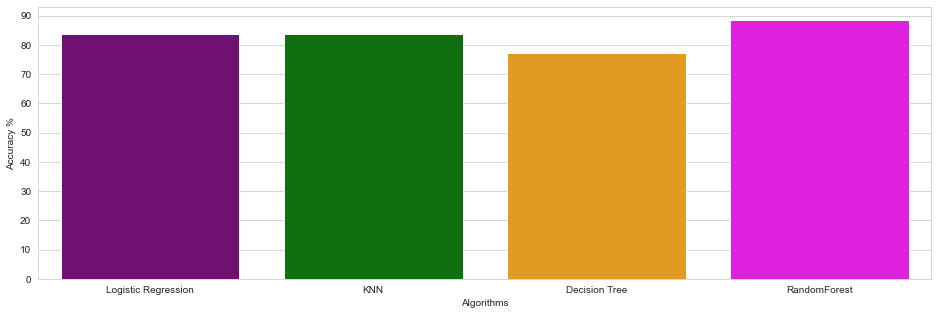

In [123]:
colors = ["purple", "green", "orange", "magenta"]

sb.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sb.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)